In [1]:
%cd ..

/home/horstl/git/Music-recognition


In [44]:
import IPython.display as ipd
from pathlib import Path
import matplotlib.pyplot as plt
from PIL import Image
import torch
import torchaudio

from musicrecognition.audio_dataloader import AudioDataloader
from musicrecognition.train import get_song_paths
from musicrecognition.augmentation import get_augmenter

In [5]:
data_root = Path('data')
songs_paths = get_song_paths(data_root / 'songs')
augmenter = get_augmenter(data_root / 'background_noises')
audio_loader = AudioDataloader(songs_paths, augmenter, 4, 10, 30, 44100)

In [6]:
anchors, positives, negatives = next(audio_loader)
ipd.display(ipd.Audio(anchors[0], rate=44100))
ipd.display(ipd.Audio(positives[0], rate=44100))
ipd.display(ipd.Audio(negatives[0], rate=44100))

In [8]:
import torchaudio


torchaudio.transforms.Spectrogram()

<module 'torchaudio' from '/home/horstl/git/Music-recognition/venv/lib/python3.8/site-packages/torchaudio/__init__.py'>

Shape of spectrogram: torch.Size([4, 201, 3003])


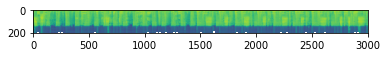

In [21]:
specgram = torchaudio.transforms.Spectrogram()(anchors[:, 0])

print("Shape of spectrogram: {}".format(specgram.size()))

plt.figure()
plt.imshow(specgram.log2()[0,:,:].numpy())

In [22]:
anchors.shape

torch.Size([4, 1, 600537])

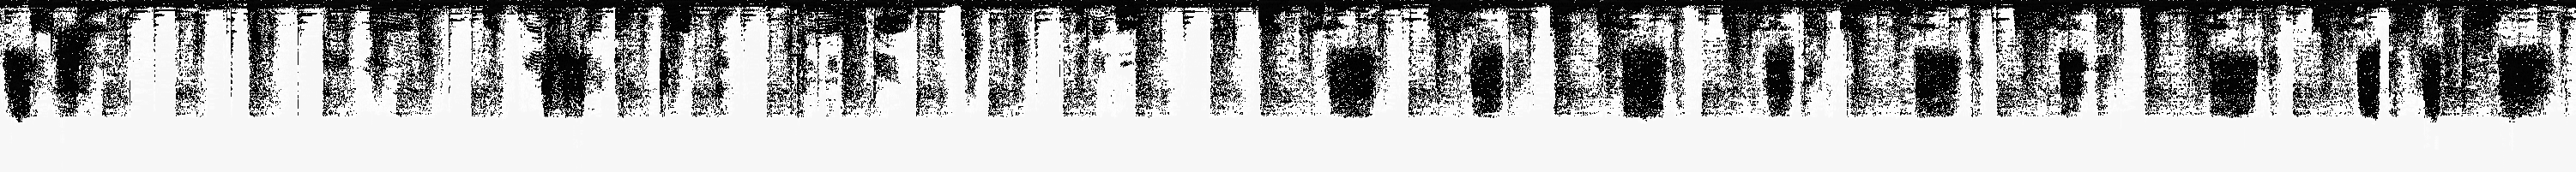

In [51]:
Image.fromarray(torch.maximum(specgram, torch.full_like(specgram, 0.001)).log2().numpy().astype('uint8')[0])

In [49]:
torch.maximum(specgram, torch.full_like(specgram, 0.001)).log2().min()

tensor(-9.9658)

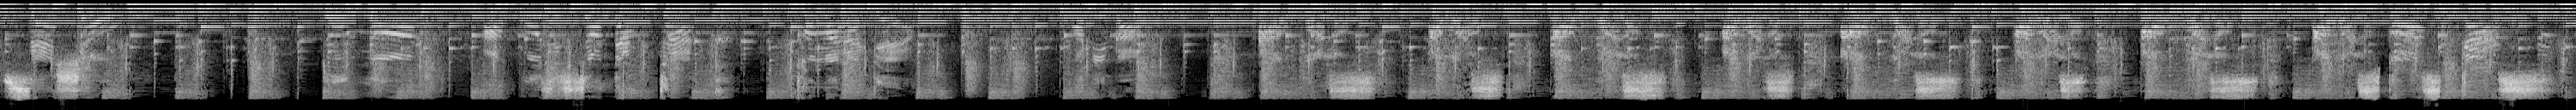

In [91]:
def normalize_spec(specgram):
    #between = specgram
    between = torch.maximum(specgram, torch.full_like(specgram, 0.001)).log2()
    return between

def plot_spec(specgram):
    return Image.fromarray(((specgram - specgram.min()) / (specgram - specgram.min()).max() * 255).numpy().astype('uint8'))

specgram = torchaudio.transforms.MelSpectrogram(sample_rate=44100)(anchors[:, 0])
plot_spec(normalize_spec(specgram)[0])

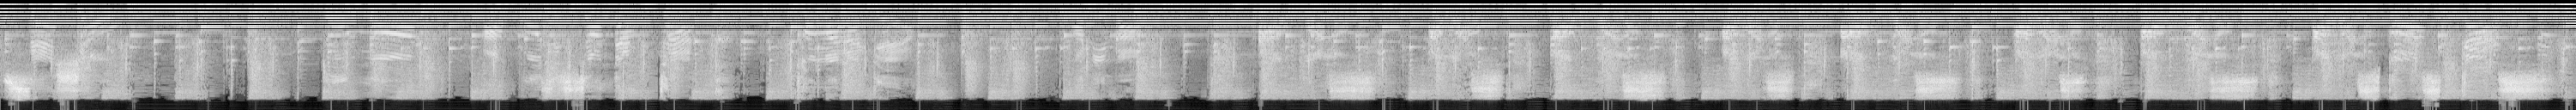

In [94]:
specgram = torchaudio.transforms.MelSpectrogram(sample_rate=44100)(anchors[:, 0])
plot_spec(torchaudio.transforms.AmplitudeToDB()(specgram)[0])

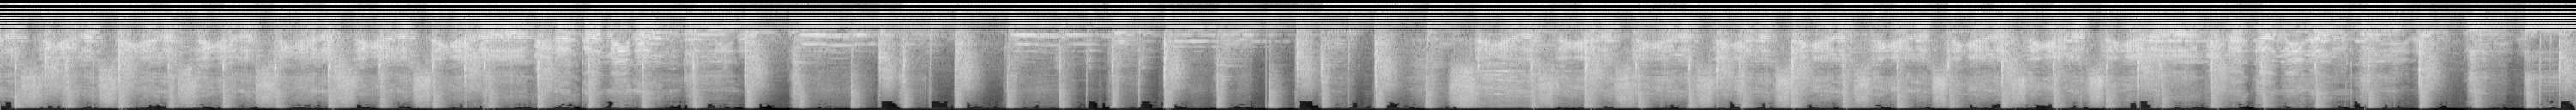

In [96]:
specgram = torchaudio.transforms.MelSpectrogram(sample_rate=44100)(negatives[:, 0])
plot_spec(torchaudio.transforms.AmplitudeToDB()(specgram)[0])